# Coding Etiquette & Excel reporting
- Drop columns containing PII
- Create regional segmentation: Northeast, Midwest, South, West
- Compare spending flag by region
- Create exclusion flag for customers with less than 5 orders
- Create subset with "low" activity users, exclude it from data set, export
- Create customer profiles: big family, high earner, party goer, no dependants, senior citizen and young parent
- Create crosstab to compare + visualize customer profile x region 
- Create individual subsets + bar charts for each customer profile to compare region x department_id
- Create subset for Midwest


In [1]:
# Install libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import data set
df_merged = pd.read_pickle(r'/Users/OldBobJulia/Desktop/CF/Course/4. Python/Instacart Basket Analysis/02 Data/Prepared data/df_merged070821.2.pkl')

In [3]:
# Check
df_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,first_name,surname,gender,state,age,n_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both


In [4]:
df_merged.shape

(17027529, 30)

In [5]:
# Drop non GDPR compliant columns containing PII first_name, surname 
df_merged = df_merged.drop(columns = ['first_name', 'surname'])

In [6]:
df_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spending_flag,order_frequency,order_frequency_flag,gender,state,age,n_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,Low spender,14.0,Regular customer,Female,Alabama,31,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Low spender,14.0,Regular customer,Female,Alabama,31,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Low spender,14.0,Regular customer,Female,Alabama,31,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Low spender,14.0,Regular customer,Female,Alabama,31,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Low spender,14.0,Regular customer,Female,Alabama,31,3,married,40423,both


In [7]:
df_merged.tail()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spending_flag,order_frequency,order_frequency_flag,gender,state,age,n_dependants,fam_status,income,_merge
17027524,1622283,19694,1,6,19,0.0,45328,1,0,"Flavored Vodka, Peach",...,Low spender,19.0,Regular customer,Female,Delaware,40,2,married,69152,both
17027525,1359947,19694,2,3,19,4.0,45328,1,1,"Flavored Vodka, Peach",...,Low spender,19.0,Regular customer,Female,Delaware,40,2,married,69152,both
17027526,1114484,19694,3,0,17,4.0,45328,1,1,"Flavored Vodka, Peach",...,Low spender,19.0,Regular customer,Female,Delaware,40,2,married,69152,both
17027527,664363,19694,3,0,15,30.0,36948,7,0,Rehab Lemonade Tea,...,Low spender,19.0,Regular customer,Female,Delaware,40,2,married,69152,both
17027528,1682892,19694,5,2,18,19.0,7958,5,0,"Diet Creamy Root Beer Premium Soda, Zero Calor...",...,Low spender,19.0,Regular customer,Female,Delaware,40,2,married,69152,both


In [8]:
# Drop add_to_cart_order and reordered bc not needed 
df_merged = df_merged.drop(columns = ['add_to_cart_order', 'reordered'])

In [9]:
df_merged.shape

(17027529, 26)

In [10]:
# Check dtypes
df_merged.dtypes

order_id                     int64
user_id                      int64
order_number                 int64
orders_day_of_week           int64
order_hour_of_day            int64
days_since_prior_order     float64
product_id                   int64
product_name                object
department_id                int64
prices                     float64
price_range_loc             object
busiest_day                 object
busiest_period_of_day       object
max_order                    int64
loyalty_flag                object
spending_mean              float64
spending_flag               object
order_frequency            float64
order_frequency_flag        object
gender                      object
state                       object
age                          int64
n_dependants                 int64
fam_status                  object
income                       int64
_merge                    category
dtype: object

In [11]:
# Change dtypes orders_day_of_week, order_hour_of_day, department_id to save on RAM 
df_merged['orders_day_of_week'] = df_merged['orders_day_of_week'].astype('int8')

In [12]:
df_merged['order_hour_of_day'] = df_merged['order_hour_of_day'].astype('int8')

In [13]:
df_merged['department_id'] = df_merged ['department_id'].astype('int8')

In [14]:
# Check
df_merged.dtypes

order_id                     int64
user_id                      int64
order_number                 int64
orders_day_of_week            int8
order_hour_of_day             int8
days_since_prior_order     float64
product_id                   int64
product_name                object
department_id                 int8
prices                     float64
price_range_loc             object
busiest_day                 object
busiest_period_of_day       object
max_order                    int64
loyalty_flag                object
spending_mean              float64
spending_flag               object
order_frequency            float64
order_frequency_flag        object
gender                      object
state                       object
age                          int64
n_dependants                 int64
fam_status                  object
income                       int64
_merge                    category
dtype: object

In [14]:
# Create regional segmentation using loc 
df_merged.loc[df_merged['state'] == ('Maine' or 'New Hampshire' or 'Vermont' or 'Massachusetts' or 'Rhode Island' or 'Connecticut' or 'New York' or 'Pennsylvania' or 'New Jersey'), 'region'] = 'Northeast'

In [15]:
df_merged.loc[df_merged['state'] == ('Wisconsin' or 'Michigan' or 'Illinois' or 'Indiana' or 'Ohio' or 'North Dakota' or 'South Dakota' or 'Nebraska' or 'Kansas' or 'Minnesota' or 'Iowa' or 'Missouri'), 'region'] = 'Midwest'

In [16]:
df_merged.loc[df_merged['state'] == ('Delaware' or 'Maryland' or 'District of Columbia' or 'Virginia' or 'West Virginia' or 'North Carolina' or 'South Carolina' or 'Georgia' or 'Florida' or 'Kentucky' or 'Tennessee' or 'Mississippi' or 'Alabama' or 'Oklahoma'or 'Texas'or 'Arkansas' or 'Louisiana'), 'region'] = 'South'


In [17]:
df_merged.loc[df_merged['state'] == ('Idaho' or 'Montana' or 'Wyoming' or 'Nevada' or 'Utah' or 'Colorado' or 'Arizona' or 'New Mexico' or 'Alaska' or 'Washington' or 'Oregon' or 'California' or 'Hawaii'), 'region'] = 'West'


In [18]:
# Check
df_merged['region'].value_counts(dropna=False)

NaN          15705989
Northeast      342816
South          327019
Midwest        326510
West           325195
Name: region, dtype: int64

# This isn't working

In [15]:
# Check state counts
df_merged['state'].value_counts(dropna=False)

New York                362103
Arkansas                349025
Wyoming                 348522
Alabama                 346246
North Dakota            346049
Minnesota               345774
Montana                 344374
Maine                   342816
New Hampshire           342248
Pennsylvania            341213
California              340880
Virginia                340811
Rhode Island            340134
Michigan                339765
Maryland                339560
Indiana                 339158
Louisiana               338693
North Carolina          337566
Kentucky                336700
Mississippi             336640
Kansas                  336499
South Carolina          335591
Tennessee               335550
Iowa                    335526
New Jersey              335242
Massachusetts           333743
Illinois                332105
Arizona                 331672
Oklahoma                331026
Connecticut             331007
Washington              330787
New Mexico              330058
Hawaii  

In [16]:
# Try one-by-one (seriously?)
df_merged.loc[df_merged['state'] == 'Maine', 'region'] = 'Northeast'
df_merged.loc[df_merged['state'] == 'New Hampshire', 'region'] = 'Northeast'
df_merged.loc[df_merged['state'] == 'Vermont', 'region'] = 'Northeast'
df_merged.loc[df_merged['state'] == 'Massachusetts', 'region'] = 'Northeast'
df_merged.loc[df_merged['state'] == 'Rhode Island', 'region'] = 'Northeast'
df_merged.loc[df_merged['state'] == 'Connecticut', 'region'] = 'Northeast'
df_merged.loc[df_merged['state'] == 'New York', 'region'] = 'Northeast'
df_merged.loc[df_merged['state'] == 'Pennsylvania', 'region'] = 'Northeast'
df_merged.loc[df_merged['state'] == 'New Jersey', 'region'] = 'Northeast'

In [17]:
# Set region 2
df_merged.loc[df_merged['state'] == 'Wisconsin', 'region'] = 'Midwest'
df_merged.loc[df_merged['state'] == 'Michigan', 'region'] = 'Midwest'
df_merged.loc[df_merged['state'] == 'Illinois', 'region'] = 'Midwest'
df_merged.loc[df_merged['state'] == 'Indiana', 'region'] = 'Midwest'
df_merged.loc[df_merged['state'] == 'Ohio', 'region'] = 'Midwest'
df_merged.loc[df_merged['state'] == 'North Dakota', 'region'] = 'Midwest'
df_merged.loc[df_merged['state'] == 'South Dakota', 'region'] = 'Midwest'
df_merged.loc[df_merged['state'] == 'Nebraska', 'region'] = 'Midwest'
df_merged.loc[df_merged['state'] == 'Kansas', 'region'] = 'Midwest'
df_merged.loc[df_merged['state'] == 'Minnesota', 'region'] = 'Midwest'
df_merged.loc[df_merged['state'] == 'Iowa', 'region'] = 'Midwest'
df_merged.loc[df_merged['state'] == 'Missouri', 'region'] = 'Midwest'

In [18]:
# Set region 3
df_merged.loc[df_merged['state'] == 'Delaware', 'region'] = 'South'
df_merged.loc[df_merged['state'] == 'District of Columbia', 'region'] = 'South'
df_merged.loc[df_merged['state'] == 'Maryland', 'region'] = 'South'
df_merged.loc[df_merged['state'] == 'Virginia', 'region'] = 'South'
df_merged.loc[df_merged['state'] == 'West Virginia', 'region'] = 'South'
df_merged.loc[df_merged['state'] == 'North Carolina', 'region'] = 'South'
df_merged.loc[df_merged['state'] == 'South Carolina', 'region'] = 'South'
df_merged.loc[df_merged['state'] == 'Georgia', 'region'] = 'South'
df_merged.loc[df_merged['state'] == 'Florida', 'region'] = 'South'
df_merged.loc[df_merged['state'] == 'Kentucky', 'region'] = 'South'
df_merged.loc[df_merged['state'] == 'Tennessee', 'region'] = 'South'
df_merged.loc[df_merged['state'] == 'Mississippi', 'region'] = 'South'
df_merged.loc[df_merged['state'] == 'Alabama', 'region'] = 'South'
df_merged.loc[df_merged['state'] == 'Oklahoma', 'region'] = 'South'
df_merged.loc[df_merged['state'] == 'Texas', 'region'] = 'South'
df_merged.loc[df_merged['state'] == 'Arkansas', 'region'] = 'South'
df_merged.loc[df_merged['state'] == 'Louisiana', 'region'] = 'South'

In [19]:
# Set region 4
df_merged.loc[df_merged['state'] == 'Idaho', 'region'] = 'West'
df_merged.loc[df_merged['state'] == 'Montana', 'region'] = 'West'
df_merged.loc[df_merged['state'] == 'Wyoming', 'region'] = 'West'
df_merged.loc[df_merged['state'] == 'Nevada', 'region'] = 'West'
df_merged.loc[df_merged['state'] == 'Utah', 'region'] = 'West'
df_merged.loc[df_merged['state'] == 'Colorado', 'region'] = 'West'
df_merged.loc[df_merged['state'] == 'Arizona', 'region'] = 'West'
df_merged.loc[df_merged['state'] == 'New Mexico', 'region'] = 'West'
df_merged.loc[df_merged['state'] == 'Alaska', 'region'] = 'West'
df_merged.loc[df_merged['state'] == 'Washington', 'region'] = 'West'
df_merged.loc[df_merged['state'] == 'Oregon', 'region'] = 'West'
df_merged.loc[df_merged['state'] == 'California', 'region'] = 'West'
df_merged.loc[df_merged['state'] == 'Hawaii', 'region'] = 'West'

In [20]:
# Check
df_merged['region'].value_counts(dropna=False)

South        5681692
West         4296663
Midwest      3997298
Northeast    3051876
Name: region, dtype: int64

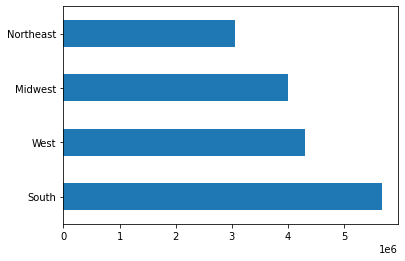

In [27]:
bar_customer_by_region = df_merged['region'].value_counts(dropna=False).plot.barh()

In [28]:
# Export
path = r'/Users/OldBobJulia/Desktop/CF/Course/4. Python/Instacart Basket Analysis/04 Analysis'

In [31]:
bar_customer_by_region = bar_customer_by_region.figure.savefig(os.path.join(path, 'Visualizations', 'bar_customer_by_region.png'))

# Most customers are located in the South. The least are in the Northeast. 

In [82]:
# Create crosstab 
crosstab = pd.crosstab(df_merged['region'], df_merged['spending_flag'], dropna = False)

In [83]:
crosstab

spending_flag,High spender,Low spender
region,,
Midwest,0,3992765
Northeast,234,3048437
South,103,5675310
West,138,4290280


# The Northeast has the highest number of high spenders and the South has the highest number of low spenders. 

<AxesSubplot:xlabel='region'>

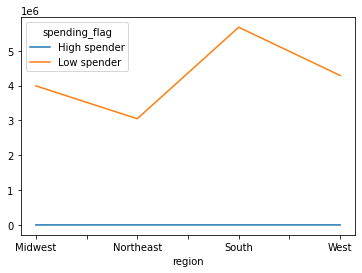

In [85]:
crosstab.plot()

<AxesSubplot:xlabel='region'>

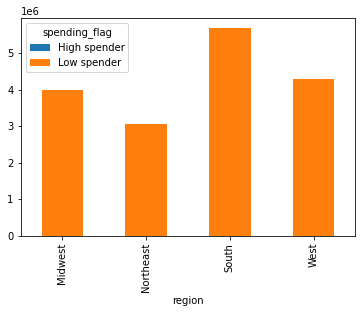

In [86]:
crosstab.plot.bar(stacked=True)

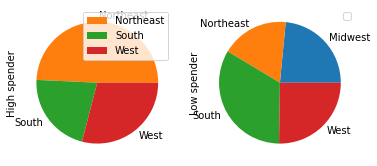

In [109]:
pie_spenders = crosstab.plot.pie(subplots=True)
plt.legend([])

In [33]:
# Create exclusion flag for customers with less than 5 orders using loc
df_merged.loc[df_merged['max_order'] < 5, 'customer_activity'] = 'low'
df_merged.loc[df_merged['max_order'] >= 5, 'customer_activity'] = 'regular'

In [34]:
df_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,product_name,department_id,prices,...,order_frequency_flag,gender,state,age,n_dependants,fam_status,income,_merge,region,customer_activity
0,2539329,1,1,2,8,0.0,196,Soda,7,9.0,...,Regular customer,Female,Alabama,31,3,married,40423,both,South,regular
1,2398795,1,2,3,7,15.0,196,Soda,7,9.0,...,Regular customer,Female,Alabama,31,3,married,40423,both,South,regular
2,473747,1,3,3,12,21.0,196,Soda,7,9.0,...,Regular customer,Female,Alabama,31,3,married,40423,both,South,regular
3,2254736,1,4,4,7,29.0,196,Soda,7,9.0,...,Regular customer,Female,Alabama,31,3,married,40423,both,South,regular
4,431534,1,5,4,15,28.0,196,Soda,7,9.0,...,Regular customer,Female,Alabama,31,3,married,40423,both,South,regular


In [35]:
df_merged['customer_activity'].value_counts(dropna=False)

regular    17007267
low           20262
Name: customer_activity, dtype: int64

In [36]:
# Check shape
df_merged.shape

(17027529, 28)

In [37]:
df_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,product_name,department_id,prices,...,order_frequency_flag,gender,state,age,n_dependants,fam_status,income,_merge,region,customer_activity
0,2539329,1,1,2,8,0.0,196,Soda,7,9.0,...,Regular customer,Female,Alabama,31,3,married,40423,both,South,regular
1,2398795,1,2,3,7,15.0,196,Soda,7,9.0,...,Regular customer,Female,Alabama,31,3,married,40423,both,South,regular
2,473747,1,3,3,12,21.0,196,Soda,7,9.0,...,Regular customer,Female,Alabama,31,3,married,40423,both,South,regular
3,2254736,1,4,4,7,29.0,196,Soda,7,9.0,...,Regular customer,Female,Alabama,31,3,married,40423,both,South,regular
4,431534,1,5,4,15,28.0,196,Soda,7,9.0,...,Regular customer,Female,Alabama,31,3,married,40423,both,South,regular


In [38]:
# Create subset with "low"
df_low = df_merged[df_merged['customer_activity'] == 'low']

In [39]:
df_low.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,product_name,department_id,prices,...,order_frequency_flag,gender,state,age,n_dependants,fam_status,income,_merge,region,customer_activity
254907,1483639,10338,2,6,18,7.0,196,Soda,7,9.0,...,Frequent customer,Female,Minnesota,34,0,single,43692,both,Midwest,low
254908,2681322,10338,1,1,14,0.0,13176,Bag of Organic Bananas,4,10.3,...,Frequent customer,Female,Minnesota,34,0,single,43692,both,Midwest,low
254909,374069,10338,2,3,16,9.0,13176,Bag of Organic Bananas,4,10.3,...,Frequent customer,Female,Minnesota,34,0,single,43692,both,Midwest,low
254910,3179994,10338,3,5,10,16.0,13176,Bag of Organic Bananas,4,10.3,...,Frequent customer,Female,Minnesota,34,0,single,43692,both,Midwest,low
254911,2247514,10338,3,2,15,6.0,16797,Strawberries,4,1.3,...,Frequent customer,Female,Minnesota,34,0,single,43692,both,Midwest,low


In [40]:
df_low.shape

(20262, 28)

In [41]:
# Exclude subset "low" from main df
df_merged = df_merged.drop(df_low.index, axis=0)

In [42]:
df_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,product_name,department_id,prices,...,order_frequency_flag,gender,state,age,n_dependants,fam_status,income,_merge,region,customer_activity
0,2539329,1,1,2,8,0.0,196,Soda,7,9.0,...,Regular customer,Female,Alabama,31,3,married,40423,both,South,regular
1,2398795,1,2,3,7,15.0,196,Soda,7,9.0,...,Regular customer,Female,Alabama,31,3,married,40423,both,South,regular
2,473747,1,3,3,12,21.0,196,Soda,7,9.0,...,Regular customer,Female,Alabama,31,3,married,40423,both,South,regular
3,2254736,1,4,4,7,29.0,196,Soda,7,9.0,...,Regular customer,Female,Alabama,31,3,married,40423,both,South,regular
4,431534,1,5,4,15,28.0,196,Soda,7,9.0,...,Regular customer,Female,Alabama,31,3,married,40423,both,South,regular


In [43]:
df_merged.shape

(17007267, 28)

# Looks correct!

In [39]:
# Export 
path = r'/Users/OldBobJulia/Desktop/CF/Course/4. Python/Instacart Basket Analysis/02 Data'

In [40]:
df_merged.to_pickle(os.path.join(path, 'Prepared data', 'df_merged090821.pkl'))

In [44]:
# Create customer profile "young parent"
df_merged.loc[(df_merged['n_dependants'] >= 1) & (df_merged['age'] <= 35), 'customer_profile'] = 'young parent'

In [45]:
# Check
df_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,product_name,department_id,prices,...,gender,state,age,n_dependants,fam_status,income,_merge,region,customer_activity,customer_profile
0,2539329,1,1,2,8,0.0,196,Soda,7,9.0,...,Female,Alabama,31,3,married,40423,both,South,regular,young parent
1,2398795,1,2,3,7,15.0,196,Soda,7,9.0,...,Female,Alabama,31,3,married,40423,both,South,regular,young parent
2,473747,1,3,3,12,21.0,196,Soda,7,9.0,...,Female,Alabama,31,3,married,40423,both,South,regular,young parent
3,2254736,1,4,4,7,29.0,196,Soda,7,9.0,...,Female,Alabama,31,3,married,40423,both,South,regular,young parent
4,431534,1,5,4,15,28.0,196,Soda,7,9.0,...,Female,Alabama,31,3,married,40423,both,South,regular,young parent


In [46]:
# Create customer profile "senior citizen"
df_merged.loc[(df_merged['age'] >= 65), 'customer_profile'] = 'senior citizen'

In [47]:
# Create customer profile "high earner"
df_merged.loc[df_merged['income'] >= 107000, 'customer_profile'] = 'high earner'

In [48]:
# Create customer profile "big family"
df_merged.loc[df_merged['n_dependants'] >= 3, 'customer_profile'] = 'big family'

In [49]:
# Create customer profile "party goer"
df_merged.loc[df_merged['department_id'].isin([5, 20]) & df_merged['orders_day_of_week'].isin([5, 6, 0]), 'customer_profile'] = 'party goer'

In [50]:
# Create customer profile "no dependants"
df_merged.loc[df_merged['n_dependants'] == 0, 'customer_profile'] = 'no dependants'

In [51]:
df_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,product_name,department_id,prices,...,gender,state,age,n_dependants,fam_status,income,_merge,region,customer_activity,customer_profile
0,2539329,1,1,2,8,0.0,196,Soda,7,9.0,...,Female,Alabama,31,3,married,40423,both,South,regular,big family
1,2398795,1,2,3,7,15.0,196,Soda,7,9.0,...,Female,Alabama,31,3,married,40423,both,South,regular,big family
2,473747,1,3,3,12,21.0,196,Soda,7,9.0,...,Female,Alabama,31,3,married,40423,both,South,regular,big family
3,2254736,1,4,4,7,29.0,196,Soda,7,9.0,...,Female,Alabama,31,3,married,40423,both,South,regular,big family
4,431534,1,5,4,15,28.0,196,Soda,7,9.0,...,Female,Alabama,31,3,married,40423,both,South,regular,big family


In [52]:
# Check value counts
df_merged['customer_profile'].value_counts(dropna=False)

no dependants     4202019
big family        4132672
high earner       3136976
young parent      2390447
NaN               2017685
senior citizen     909726
party goer         217742
Name: customer_profile, dtype: int64

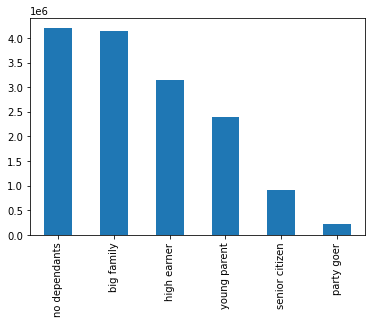

In [53]:
# Create bar chart of customer profiles
bar_customer_profile = df_merged['customer_profile'].value_counts().plot.bar()

In [54]:
# Aggregate min, max, mean on customer profile level for usage frequency 
df_merged.groupby('customer_profile').agg({'order_frequency': ['mean', 'min', 'max']})

order_frequency           
                            mean  min   max
customer_profile                           
big family              8.584331  0.0  30.0
high earner             8.418806  1.0  30.0
no dependants           8.369973  0.0  30.0
party goer              8.628191  0.0  30.0
senior citizen          8.539826  1.0  30.0
young parent            8.409848  0.0  30.0

In [55]:
# Just aggregate by mean to create visual
df_merged.groupby('customer_profile').agg({'order_frequency': ['mean']})

,order_frequency
,mean
customer_profile,
big family,8.584331
high earner,8.418806
no dependants,8.369973
party goer,8.628191
senior citizen,8.539826
young parent,8.409848


(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 [Text(-1.0, 0, 'young parent'),
  Text(0.0, 0, 'big family'),
  Text(1.0, 0, 'high earner'),
  Text(2.0, 0, 'no dependants'),
  Text(3.0, 0, 'party goer'),
  Text(4.0, 0, 'senior citizen'),
  Text(5.0, 0, 'young parent'),
  Text(6.0, 0, '')])

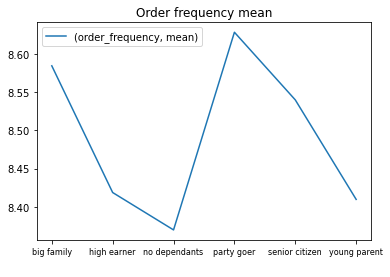

In [79]:
# Visualize it 
returning_customers_by_profile = df_merged.groupby('customer_profile').agg({'order_frequency': ['mean']}).plot().legend(loc=False)
plt.title('Order frequency mean')
plt.xlabel(' ')
plt.xticks(size = 8)

# The most frequently returning customer profile is the no dependants. The least frequently returning customer profile is the party goer.¶

In [72]:
df_merged.groupby('customer_profile').agg({'prices':['mean', 'min', 'max']})

prices           
                      mean  min   max
customer_profile                     
big family        7.794441  1.0  25.0
high earner       7.855168  1.0  25.0
no dependants     7.783232  1.0  25.0
party goer        7.839748  1.0  15.0
senior citizen    7.706301  1.0  25.0
young parent      7.798899  1.0  25.0

In [73]:
# Just aggregate mean for visual 
df_merged.groupby('customer_profile').agg({'prices':['mean']})

,prices
,mean
customer_profile,
big family,7.794441
high earner,7.855168
no dependants,7.783232
party goer,7.839748
senior citizen,7.706301
young parent,7.798899


(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 [Text(-1.0, 0, 'young parent'),
  Text(0.0, 0, 'big family'),
  Text(1.0, 0, 'high earner'),
  Text(2.0, 0, 'no dependants'),
  Text(3.0, 0, 'party goer'),
  Text(4.0, 0, 'senior citizen'),
  Text(5.0, 0, 'young parent'),
  Text(6.0, 0, '')])

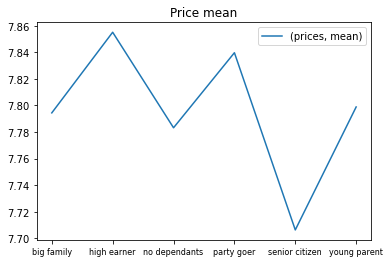

In [80]:
prices_customers_by_profile = df_merged.groupby('customer_profile').agg({'prices': ['mean']}).plot().legend(loc=False)
plt.title('Price mean')
plt.xlabel(' ')
plt.xticks(size = 8)

# The customer profile spending the most on average is the high earner. The one spending least is the senior citizen. 

In [60]:
df_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,product_name,department_id,prices,...,gender,state,age,n_dependants,fam_status,income,_merge,region,customer_activity,customer_profile
0,2539329,1,1,2,8,0.0,196,Soda,7,9.0,...,Female,Alabama,31,3,married,40423,both,South,regular,big family
1,2398795,1,2,3,7,15.0,196,Soda,7,9.0,...,Female,Alabama,31,3,married,40423,both,South,regular,big family
2,473747,1,3,3,12,21.0,196,Soda,7,9.0,...,Female,Alabama,31,3,married,40423,both,South,regular,big family
3,2254736,1,4,4,7,29.0,196,Soda,7,9.0,...,Female,Alabama,31,3,married,40423,both,South,regular,big family
4,431534,1,5,4,15,28.0,196,Soda,7,9.0,...,Female,Alabama,31,3,married,40423,both,South,regular,big family


In [63]:
# Create crosstab to compare customer profile and region
crosstab_customer_region = pd.crosstab(df_merged['customer_profile'], df_merged['region'], dropna = False)

In [64]:
crosstab_customer_region

region,Midwest,Northeast,South,West
customer_profile,,,,
big family,953504,713152,1387908,1078108
high earner,726138,591011,1042002,777825
no dependants,1002982,766216,1383852,1048969
party goer,51104,38379,72751,55508
senior citizen,220551,165623,288952,234600
young parent,587254,410413,804628,588152


<AxesSubplot:xlabel='customer_profile'>

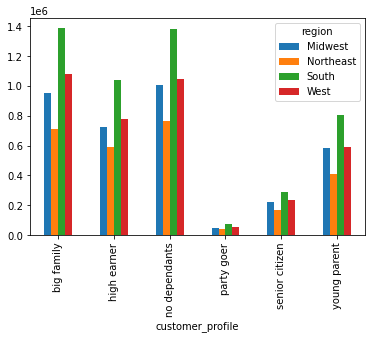

In [74]:
# Make bar plot
crosstab_customer_region.plot.bar()

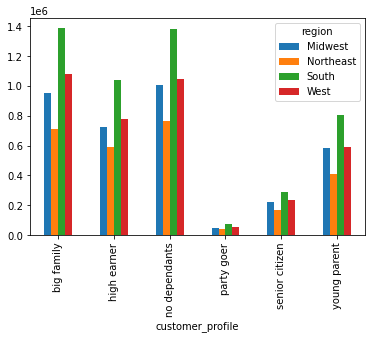

In [81]:
crosstab_customer_region_bar = crosstab_customer_region.plot.bar()

# the South is the region with most active customers across all customer profiles. The proportions of the distribution of different customer profiles is similar across all regions.

In [78]:
# Export crosstab customer region 
path ='/Users/OldBobJulia/Desktop/CF/Course/4. Python/Instacart Basket Analysis/04 Analysis'

In [82]:
crosstab_customer_region_bar.figure.savefig(os.path.join(path, 'Visualizations', 'crosstab_customer_region.png'))

In [87]:
crosstab_customer_department = pd.crosstab(df_merged['customer_profile'], df_merged['department_id'], dropna = False)

In [88]:
crosstab_customer_department

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
customer_profile,,,,,,,,,,,,,,,,,,,,,
big family,287199,4693,153287,1238856,11774,34841,345227,11879,111903,4335,...,92372,242821,91816,139938,699059,96974,52319,373188,73988,8757
high earner,221716,3322,115689,937070,9164,26837,259130,9768,86385,3158,...,72059,187005,68162,106224,539064,72219,40893,272506,55525,6985
no dependants,289565,4622,152294,1227095,18810,34903,352671,12309,113513,4319,...,89678,242568,91247,138486,696766,95868,58351,375146,136681,8808
party goer,0,0,0,0,24746,0,0,0,0,0,...,0,0,0,0,0,0,0,0,192996,0
senior citizen,64133,1134,34649,268299,2423,7774,78738,2849,24224,975,...,19833,53405,19937,30300,152391,20726,10941,86669,15709,1884
young parent,166505,2939,87169,712771,6848,20547,196805,7889,64351,2540,...,53129,140071,52196,80196,411885,55166,33733,215157,42591,5077


In [92]:
# Create subset big family
ss_big_family =  df_merged[df_merged['customer_profile'] == 'big family']

In [127]:
# Create crosstab region x department_id for big family
ss_big_family_crosstab = pd.crosstab(ss_big_family['region'], ss_big_family['department_id'], dropna = False)

In [128]:
ss_big_family_crosstab

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
region,,,,,,,,,,,,,,,,,,,,,
Midwest,67293,1121,36043,284373,2547,7786,80185,3159,26066,963,...,21148,55847,21031,32499,158764,23384,12767,85988,16750,2197
Northeast,49375,782,26366,216424,1418,6043,59714,1806,19339,731,...,16306,41810,15393,24183,119247,16367,9008,65465,12275,1416
South,96298,1548,51258,412089,4219,11964,117782,3967,37350,1456,...,30536,82001,31783,46765,235980,32800,16786,125521,24894,2942
West,74233,1242,39620,325970,3590,9048,87546,2947,29148,1185,...,24382,63163,23609,36491,185068,24423,13758,96214,20069,2202


Text(0.5, 0, 'Items sold')

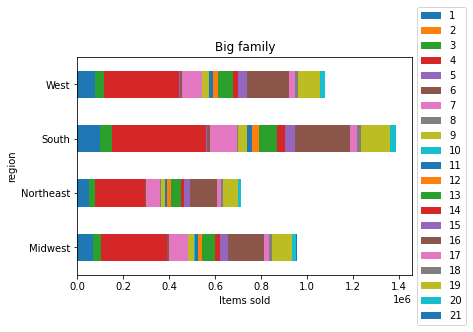

In [171]:
# Visualize it
bar_ss_big_family_crosstab = ss_big_family_crosstab.plot(kind='barh', stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Big family')
plt.xlabel('Items sold')

In [131]:
# Create subset big family
ss_high_earner =  df_merged[df_merged['customer_profile'] == 'high earner']

In [132]:
# Create crosstab region x department_id for high earner
ss_high_earner_crosstab = pd.crosstab(ss_high_earner['region'], ss_high_earner['department_id'], dropna = False)

In [133]:
ss_high_earner_crosstab

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
region,,,,,,,,,,,,,,,,,,,,,
Midwest,50598,779,26529,215331,2394,6615,61950,1984,19612,808,...,15908,43159,16366,25050,124619,16942,9396,63276,12833,1558
Northeast,40319,692,21780,178442,1300,4685,48400,2210,16775,585,...,13504,34698,12546,19257,102172,13404,8950,51479,10381,1336
South,74412,1041,38843,310530,3038,8901,85349,3251,28650,960,...,24488,63076,22835,34984,176633,24541,13485,91614,18356,2447
West,56387,810,28537,232767,2432,6636,63431,2323,21348,805,...,18159,46072,16415,26933,135640,17332,9062,66137,13955,1644


Text(0.5, 0, 'Items sold')

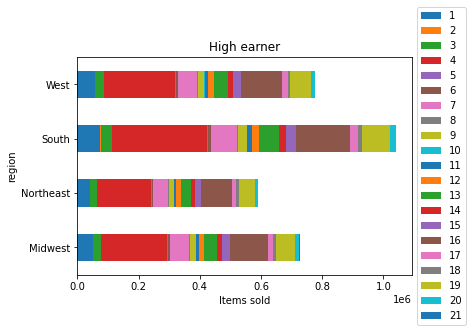

In [173]:
# Visualize it 
bar_ss_high_earner = bar_ss_high_earner_crosstab = ss_high_earner_crosstab.plot(kind='barh', stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('High earner')
plt.xlabel('Items sold')

In [135]:
# Create subset no dependants
ss_no_dependants =  df_merged[df_merged['customer_profile'] == 'no dependants']

In [136]:
# Create crosstab region x department_id for no dependants
ss_no_dependants_crosstab = pd.crosstab(ss_no_dependants['region'], ss_no_dependants['department_id'], dropna = False)

Text(0.5, 0, 'Items sold')

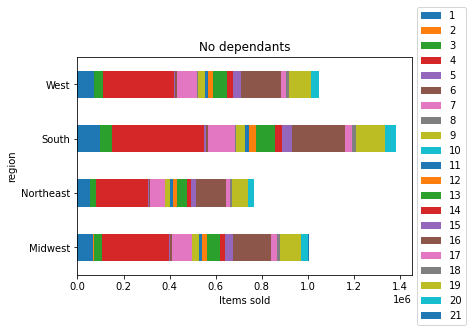

In [175]:
# Visualize it 
bar_ss_no_dependants = ss_no_dependants_crosstab.plot(kind='barh', stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('No dependants')
plt.xlabel('Items sold')

# So far this doesn't look very exciting

In [142]:
# Create subset partygoer
ss_partygoer =  df_merged[df_merged['customer_profile'] == 'party goer']

In [143]:
# Create crosstab region x department_id for partygoer
ss_partygoer_crosstab = pd.crosstab(ss_partygoer['region'], ss_partygoer['department_id'], dropna = False)

Text(0.5, 0, 'Items sold')

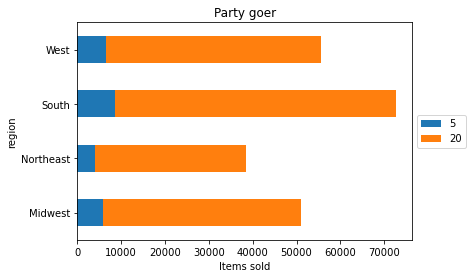

In [177]:
# Visualize it 
bar_ss_partygoer = ss_partygoer_crosstab.plot(kind='barh', stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Party goer')
plt.xlabel('Items sold')

In [145]:
# Create subset senior citizen
ss_senior_citizen =  df_merged[df_merged['customer_profile'] == 'senior citizen']

In [146]:
# Create crosstab region x department_id for senior citizen
ss_senior_citizen_crosstab= pd.crosstab(ss_senior_citizen['region'], ss_senior_citizen['department_id'], dropna = False)

Text(0.5, 0, 'Items sold')

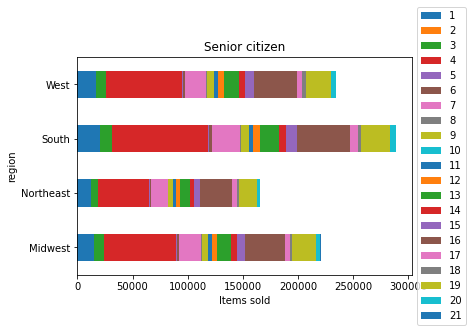

In [179]:
# Visualize it 
bar_senior_citizen = ss_senior_citizen_crosstab.plot(kind='barh', stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Senior citizen')
plt.xlabel('Items sold')

In [148]:
# Create subset young parent 
ss_young_parent =  df_merged[df_merged['customer_profile'] == 'young parent']

In [149]:
# Create crosstab region x department_id for young parent
ss_young_parent_crosstab= pd.crosstab(ss_young_parent['region'], ss_young_parent['department_id'], dropna = False)

Text(0.5, 0, 'Items sold')

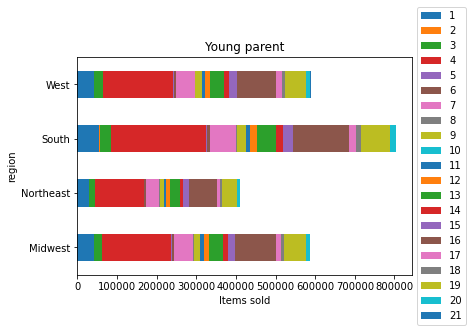

In [181]:
# Visualize it 
bar_ss_young_parent = ss_young_parent_crosstab.plot(kind='barh', stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Young parent')
plt.xlabel('Items sold')

In [151]:
# Create subset Midwest 
ss_midwest =  df_merged[df_merged['region'] == 'Midwest']

In [165]:
# Create crosstab customer_profile x department_id for Midwest
ss_midwest_crosstab= pd.crosstab(ss_midwest['customer_profile'], ss_midwest['department_id'], dropna = False)

Text(0.5, 0, 'Items sold')

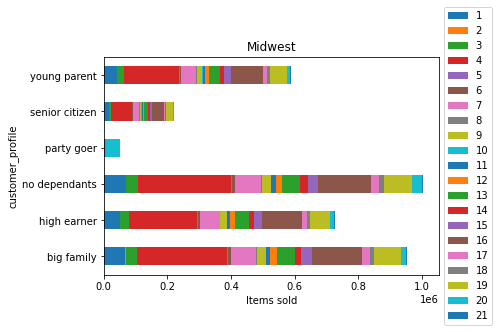

In [166]:
# Visualize it 
ss_midwest_crosstab.plot(kind='barh', stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Midwest')
plt.xlabel('Items sold')

In [172]:
# Export
bar_ss_big_family_crosstab.figure.savefig(os.path.join(path, 'Visualizations', 'crosstab_big_family.png'))

In [174]:
bar_ss_high_earner_crosstab.figure.savefig(os.path.join(path, 'Visualizations', 'crosstab_high_earner.png'))

In [176]:
bar_ss_no_dependants.figure.savefig(os.path.join(path, 'Visualizations', 'crosstab_no_dependants.png'))


In [178]:
bar_ss_partygoer.figure.savefig(os.path.join(path, 'Visualizations', 'crosstab_partygoer.png'))

In [180]:
bar_senior_citizen.figure.savefig(os.path.join(path, 'Visualizations', 'crosstab_senior_citizen.png'))

In [182]:
bar_ss_young_parent.figure.savefig(os.path.join(path, 'Visualizations', 'crosstab_young_parent.png'))

In [195]:
bar_customer_profile.figure.savefig(os.path.join(path, 'Visualizations', 'bar_customer_profile.png'))